**Inception 구조를 활용한 GoogLeNet**

GoogLeNet은 더 깊고(layer가 많고) 넓은(node가 많은) 네트워크를 사용하기 위해서 고안되었다. 뉴럴 네트워크를 deep & wide하게 만들면 더 좋은 성능을 낼 수 있지만, parameter 증가로 인한 Overfitting 문제와 computational cost가 많이 드는 문제로 사용되기 어려웠다. GoogLeNet은 Inception이라는 구조를 사용하여 22 layer의 deep한 model을 만들었다.

Deep & wide한 네트워크에서 생기는 문제점들은 Convolution이나 Fully-Connected Layer를 sparse한 구조로 바꾸면 어느 정도 해결할 수 있다. Inception 구조의 목적은 optimal한 local space structure를 근사화하여, dense한 component에서 사용 가능하도록 만드는 것이다.

Inception structure는 기존의 Convolutional layer를 적용할 때 1x1의 추가적인 Convolitional Layer를 적용한다. 1x1 convolution을 사용하면 dimension reduction으로 인한 computational cost를 감소시킬 수 있고, 네트워크의 size를 크게 만들 수 있게 해준다. 또한, patch alignment issue를 피하기 위해서, Inception structure의 filter(kernel) size를 1x1, 3x3, 5x5로 정하여 사용하였다.


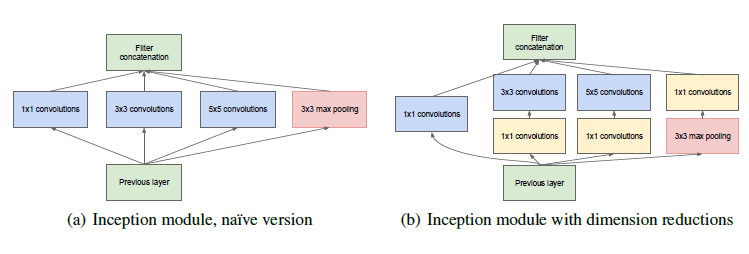




GoogLeNet은 이러한 Inception 구조를 바탕으로 네트워크 layer를 구성하였다. 모든 layer에 Inception module을 사용한 것이 아니라, 효율을 위해 어느 정도 깊이가 있는 layer에서만 사용하였다.

네트워크가 deep하면 vanishing gradient problem이라는 gradient 계속 감소하다가 거의 0이 되어버리는 현상이 발생한다. 그러면 사실상 weight(parameter)가 update가 안 된다. 이를 해결하기 위해서 GoogLeNet에서는 Auxiliary Classifier라는 방법을 사용한다. Auxiliary classifier란 output 노드에서 back-propagation을 하기 전에 중간 layer에서 back-propagation을 몇 번 해줌으로써 gradient의 손실을 막는 방법이다.

GoogLeNet의 구조는 다음과 같으며, 빨간 네모 박스가 Auxiliary classifier를 적용한 부분이다.

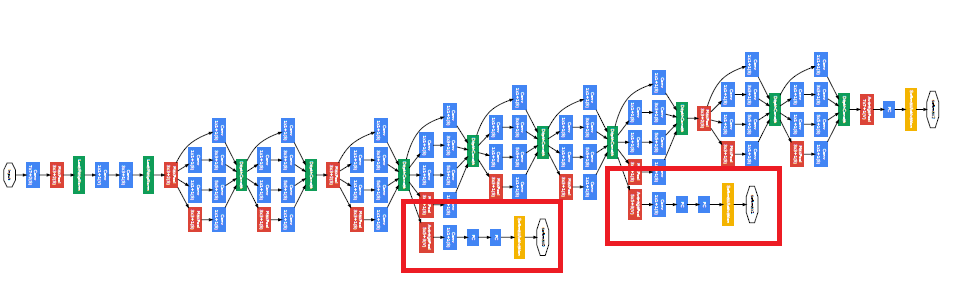



GoogLeNet의 Layer마다 사용된 parameter와 구조는 다음 그림에 잘 나타나있다.

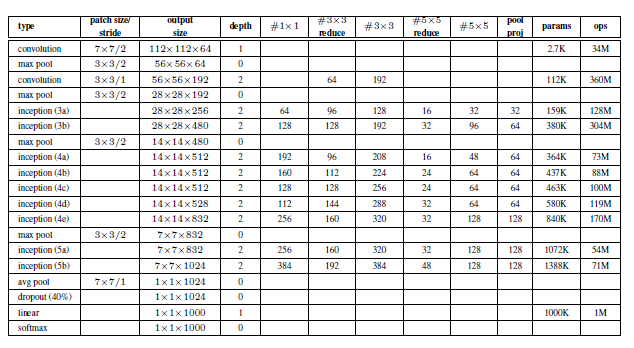

Input은 RGB 3, size 224x224인 이미지이다.

**1.**
첫번째는 C1:Convolutional Layer로 output channel 64, kernel size= 7x7, stride=2, padding=3인 Layer이다. 3x224x224 -> 64x112x112가 된다. 이후 P1:Maxpooling Layer를 통해 64x56x56이 된다.



**2, 3.**
두, 세번째는 C2:Convolutional Layer로 output channel 64, kernel size= 1x1, stride=1, padding=0인 Layer와 C3:Convolutional Layer로 output channel 192, kernel size= 3x3, stride=1, padding=1인 Layer이다. 두 Convolutional Layer를 통해 64x56x56- > 64x56x56 -> 192x56x56이 된다. 이후 P2: MaxPooling Layer를 통해 192x28x28이 된다.



**4.**
네 번째는 I1_a:Inception module와 I1_b:Inception module, max pooling layer로

i1_a는 input 192x28x28,

c1: [out=64, filter= 1x1, stride=1, padding=0]인 Conv Layer

c3: [out=96, filter= 1x1, stride=1, padding=0]인 Conv -> [out=128, filter= 3x3, stride=1, padding=1]인 Conv Layer

c5: [out=16, filter= 1x1, stride=1, padding=0]인 Conv -> [out=32, filter= 5x5, stride=1, padding=2]인 Conv Layer

p1: [size= 3, stride=1, padding=1]인 Pooling -> [out=32, filter=1x1 stride=1, padding=0]인 Conv Layer로 이루어져 있다.
이 Inception Module을 지나면 c1:64+c3:128+c5:32+p1:32에 의해 192x28x28 -> 256x28x28이 된다.

I1_b는 input 256x28x28,

c1: [out=128, filter= 1x1, stride=1, padding=0]인 Conv Layer

c3: [out=128, filter= 1x1, stride=1, padding=0]인 Conv -> [out=192, filter= 3x3, stride=1, padding=1]인 Conv Layer

c5: [out=32, filter= 1x1, stride=1, padding=0]인 Conv -> [out=96, filter= 5x5, stride=1, padding=2]인 Conv Layer

p1: [size= 3, stride=1, padding=1]인 Pooling -> [out=64, filter=1x1 stride=1, padding=0]인 Conv Layer로 이루어져 있다.
이 Inception Module을 지나면 c1:128 + c3:192 + c5:96 + p1:64에 의해 256x28x28 -> 480x28x28이 된다.

이후 Max pooling에 의해 480x28x28 -> 480x14x14가 된다.



**5.**
다섯 번째는 5개의 I2_a, I2_b, I2_c, I2_d, I2_e:Inception module과 두 번의 Auxiliary layer, 그리고 한 개의 max pooling layer로 이루어져 있다.

i2_a는 input 480x14x14,

c1: [out=192, filter= 1x1, stride=1, padding=0]인 Conv Layer

c3: [out=96, filter= 1x1, stride=1, padding=0]인 Conv -> [out=208, filter= 3x3, stride=1, padding=1]인 Conv Layer

c5: [out=16, filter= 1x1, stride=1, padding=0]인 Conv -> [out=48, filter= 5x5, stride=1, padding=2]인 Conv Layer

p1: [size= 3, stride=1, padding=1]인 Pooling -> [out=64, filter=1x1 stride=1, padding=0]인 Conv Layer로 이루어져 있다.
이 Inception Module을 지나면 c1:192+c3:208+c5:48+p1:64에 의해 480x14x14 -> 512x14x14가 된다.

I2_a 이후, Auxiliary Layer를 통해 back-Propagation을 해준다. Auxiliary Layer는 4x4 크기의 adaptive Average Pooling -> Convolutional Layer(out=128, filter=1, stride=1 padding=1) with Relu -> Fully Connected(FC) Layer(in=2048, out=1024) with Relu & dropout -> output Layer(in=1024, out=num_class) 인 Layer이다. 
크기 변화는 없기 때문에, 512x14x14 -> 512x14x14이다.

I2_b는 input 512x14x14

c1: [out=160 filter= 1x1, stride=1, padding=0]인 Conv Layer

c3: [out=112, filter= 1x1, stride=1, padding=0]인 Conv -> [out=224, filter= 3x3, stride=1, padding=1]인 Conv Layer

c5: [out=24, filter= 1x1, stride=1, padding=0]인 Conv -> [out=64, filter= 5x5, stride=1, padding=2]인 Conv Layer

p1: [size= 3, stride=1, padding=1]인 Pooling -> [out=64, filter=1x1 stride=1, padding=0]인 Conv Layer로 이루어져 있다.
이 Inception Module을 지나면 c1:160 + c3:224 + c5:64 + p1:64에 의해 512x14x14 -> 512x14x14이다.

I2_c는 input 512x14x14

c1: [out=128 filter= 1x1, stride=1, padding=0]인 Conv Layer

c3: [out=128, filter= 1x1, stride=1, padding=0]인 Conv -> [out=256, filter= 3x3, stride=1, padding=1]인 Conv Layer

c5: [out=24, filter= 1x1, stride=1, padding=0]인 Conv -> [out=64, filter= 5x5, stride=1, padding=2]인 Conv Layer

p1: [size= 3, stride=1, padding=1]인 Pooling -> [out=64, filter=1x1 stride=1, padding=0]인 Conv Layer로 이루어져 있다.
이 Inception Module을 지나면 c1:128 + c3:256 + c5:64 + p1:64에 의해 512x14x14 -> 512x14x14이다.

I2_d는 input 512x14x14

c1: [out=112 filter= 1x1, stride=1, padding=0]인 Conv Layer

c3: [out=144, filter= 1x1, stride=1, padding=0]인 Conv -> [out=288, filter= 3x3, stride=1, padding=1]인 Conv Layer

c5: [out=32, filter= 1x1, stride=1, padding=0]인 Conv -> [out=64, filter= 5x5, stride=1, padding=2]인 Conv Layer

p1: [size= 3, stride=1, padding=1]인 Pooling -> [out=64, filter=1x1 stride=1, padding=0]인 Conv Layer로 이루어져 있다.
이 Inception Module을 지나면 c1:112 + c3:288 + c5:64 + p1:64에 의해 512x14x14 -> 528x14x14가 된다.

I2_d 이후, 두 번째 Auxiliary Layer를 통해 back-Propagation을 해준다. 
크기 변화는 없기 때문에, 528x14x14 -> 528x14x14이다.

I2_e는 input 528x14x14

c1: [out=256 filter= 1x1, stride=1, padding=0]인 Conv Layer

c3: [out=160, filter= 1x1, stride=1, padding=0]인 Conv -> [out=320, filter= 3x3, stride=1, padding=1]인 Conv Layer

c5: [out=32, filter= 1x1, stride=1, padding=0]인 Conv -> [out=128, filter= 5x5, stride=1, padding=2]인 Conv Layer

p1: [size= 3, stride=1, padding=1]인 Pooling -> [out=128, filter=1x1 stride=1, padding=0]인 Conv Layer로 이루어져 있다.
이 Inception Module을 지나면 c1:256 + c3:320 + c5:128 + p1:128에 의해 528x14x14 -> 832x14x14가 된다.

이후 Max pooling에 의해 832x14x14 -> 832x7x7가 된다.



**6.**
여섯 번째는 I3_a:Inception module와 I3_b:Inception module, Adaptive Average pooling layer로

i3_a는 input 832x7x7,

c1: [out=256, filter= 1x1, stride=1, padding=0]인 Conv Layer

c3: [out=160, filter= 1x1, stride=1, padding=0]인 Conv -> [out=320, filter= 3x3, stride=1, padding=1]인 Conv Layer

c5: [out=32, filter= 1x1, stride=1, padding=0]인 Conv -> [out=128, filter= 5x5, stride=1, padding=2]인 Conv Layer

p1: [size= 3, stride=1, padding=1]인 Pooling -> [out=128, filter=1x1 stride=1, padding=0]인 Conv Layer로 이루어져 있다.
이 Inception Module을 지나면 c1:256+c3:320+c5:128+p1:128에 의해 832x7x7 -> 832x7x7이다.

I3_b는 input 832x7x7,

c1: [out=384, filter= 1x1, stride=1, padding=0]인 Conv Layer

c3: [out=192, filter= 1x1, stride=1, padding=0]인 Conv -> [out=384, filter= 3x3, stride=1, padding=1]인 Conv Layer

c5: [out=48, filter= 1x1, stride=1, padding=0]인 Conv -> [out=128, filter= 5x5, stride=1, padding=2]인 Conv Layer

p1: [size= 3, stride=1, padding=1]인 Pooling -> [out=128, filter=1x1 stride=1, padding=0]인 Conv Layer로 이루어져 있다.
이 Inception Module을 지나면 c1:384 + c3:384 + c5:128 + p1:128에 의해 832x7x7 -> 1024x7x7이 된다.

이후 1x1의 Adaptive Average pooling에 의해 1024x7x7 -> 1024x1x1이 된다. 이후 dropout을 진행한다.



**7.**
일곱 번째는 Fully-connected(FC) Layer로 output Layer이다. input은 1024이고 output은 Class의 수이다.


Pytorch와 STL10 dataset를 사용해서 GoogLeNet 구현해보기

In [1]:
# 먼저 필요한 Library import 하기

import os

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils import data

import torchvision.datasets as datasets
import torchvision.transforms as transforms


# 필요한 parameter를 미리 세팅한다.
random_seed=4
learning_rate=0.001
batch_size=32
epochs=100

image_size=224
n_classes=10

DEVICE='cuda' if torch.cuda.is_available() else 'cpu'

In [2]:
datapath='/data'

if not os.path.exists(datapath):
  os.mkdir(datapath)

#transforms로 원하는 형태의 dataset으로 변형해준다.
tfData=transforms.Compose([transforms.Resize((256,256)),
                           transforms.RandomCrop(224),  
                           transforms.ToTensor(),
                           transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5)),
                           ])

# Dataset 다운로드
train_data = datasets.STL10(datapath, split='train', download='True', transform=tfData)
test_data = datasets.STL10(datapath, split='test', download='True', transform=tfData)

print(train_data.data.shape)
print(test_data.data.shape)

train_loader=DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader=DataLoader(test_data, batch_size=batch_size, shuffle=False)

  0%|          | 0/2640397119 [00:00<?, ?it/s]

Extracting /data/stl10_binary.tar.gz to /data
Files already downloaded and verified
(5000, 3, 96, 96)
(8000, 3, 96, 96)


**GoogLeNet 구현하기**

In [3]:
 # conolutional Block 정의하기
class ConvBlock(nn.Module): 
  def __init__(self, n_in, n_out, kernel_size, stride, padding):
    super().__init__()

    self.conv=nn.Conv2d(n_in, n_out, kernel_size, stride, padding)
    self.norm=nn.BatchNorm2d(n_out)
    self.act=nn.ReLU()

  def forward(self,x):
    x=self.conv(x)
    x=self.norm(x)
    x=self.act(x)

    return x

In [4]:
# Inception Module 정의하기
class InceptionModule(nn.Module):
  def __init__(self, n_in, out1x1, bef1x1_3x3, out3x3, bef1x1_5x5, out5x5, p_out):
    super().__init__()

    # Inception module의 1x1 convolution section
    self.branch1=nn.Sequential(   
        ConvBlock(n_in, out1x1, kernel_size=1, stride=1, padding=0)
        )

    # Inception module의 1x1 convolution을 지난 후의 3x3 convoultion section
    self.branch2=nn.Sequential(
        ConvBlock(n_in, bef1x1_3x3, kernel_size=1, stride=1, padding=0),
        ConvBlock(bef1x1_3x3, out3x3, kernel_size=3, stride=1, padding=1)
        )
    
    # Inception module의 1x1 convolution을 지난 후의 5x5 convoultion section
    self.branch3=nn.Sequential(
        ConvBlock(n_in, bef1x1_5x5, kernel_size=1, stride=1, padding=0),
        ConvBlock(bef1x1_5x5, out5x5, kernel_size=5, stride=1, padding=2)
        )
    
    # Inception module의 max pooling 이후 1x1 convolution
    self.branch4=nn.Sequential(
        nn.MaxPool2d(3, stride=1, padding=1),
        ConvBlock(n_in, p_out, kernel_size=1, stride=1, padding=0)
        )
    
  def forward(self, x):
    branch1=self.branch1(x)
    branch2=self.branch2(x)
    branch3=self.branch3(x)
    branch4=self.branch4(x)

    x=torch.cat([branch1, branch2, branch3, branch4],1)

    return x

In [5]:
# Auxiliary layer 정의하기
class Aux(nn.Module):
  def __init__(self, n_in, num_class):
    super().__init__()

    self.avgpool=nn.AdaptiveAvgPool2d((4,4))  # adaptive average pooling: output size로 결정함
    self.conv=nn.Conv2d(n_in, 128, kernel_size=1, stride=1, padding=0)
    self.act=nn.ReLU()
    self.fc1=nn.Linear(2048, 1024)
    self.dropout=nn.Dropout(0.7)
    self.fc2=nn.Linear(1024, num_class)

  def forward(self, x):
    x=self.avgpool(x)
    x=self.conv(x)
    x=self.act(x)
    x=torch.flatten(x,1)
    x=self.fc1(x)
    x=self.act(x)
    x=self.dropout(x)
    x=self.fc2(x)

    return x



In [6]:
# 앞에서 정의한 class를 바탕으로 GoogLeNet 구현하기
class GoogLeNet(nn.Module):
  def __init__(self,n_classes):
    super().__init__()

    # Conv & pooling Layer
    self.conv1=ConvBlock(3, 64, kernel_size=7, stride=2, padding=3)
    self.pool1=nn.MaxPool2d(3, stride=2, padding=1)
    self.conv2=ConvBlock(64,64, kernel_size=1, stride=1, padding=0)
    self.conv3=ConvBlock(64, 192, kernel_size=3, stride=1,padding=1)
    self.pool2=nn.MaxPool2d(3, stride=2, padding=1)

    # Inception Layer 1
    self.inception1a=InceptionModule(192, 64, 96, 128, 16, 32, 32)
    self.inception1b=InceptionModule(256, 128, 128, 192, 32, 96, 64)
    self.pool3=nn.MaxPool2d(3, stride=2, padding=1)

    # Inception Layer 2
    self.inception2a=InceptionModule(480, 192, 96, 208, 16, 48, 64)
    self.aux1=Aux(512, n_classes)    # Auxiliary
    self.inception2b=InceptionModule(512, 160, 112, 224, 24, 64, 64)
    self.inception2c=InceptionModule(512, 128, 128, 256, 24, 64, 64)
    self.inception2d=InceptionModule(512, 112, 144, 288, 32, 64, 64)
    self.aux2=Aux(528, n_classes) # Auxiliary
    self.inception2e=InceptionModule(528, 256, 160, 320, 32, 128, 128)
    self.pool4=nn.MaxPool2d(3, stride=2, padding=1)
    
    # Inception Layer 3
    self.inception3a=InceptionModule(832, 256, 160, 320, 32, 128,128)
    self.inception3b=InceptionModule(832, 384, 192, 384, 48, 128, 128)
    self.pool5=nn.AdaptiveAvgPool2d((1,1))
    self.dropout=nn.Dropout(0.4)
    
    # Fully-Connected Layer(output)
    self.fc=nn.Linear(1024, n_classes)

  def forward(self, x):
    x=self.conv1(x)
    x=self.pool1(x)
    x=self.conv2(x)
    x=self.conv3(x)
    x=self.pool2(x)

    x=self.inception1a(x)
    x=self.inception1b(x)
    x=self.pool3(x)

    x=self.inception2a(x)
    aux1=self.aux1(x)
    x=self.inception2b(x)
    x=self.inception2c(x)
    x=self.inception2d(x)
    aux2=self.aux2(x)
    x=self.inception2e(x)
    x=self.pool4(x)

    x=self.inception3a(x)
    x=self.inception3b(x)
    x=self.pool5(x)
    x=torch.flatten(x,1)
    x=self.dropout(x)
    x=self.fc(x)

    return x, aux1, aux2


In [7]:
model=GoogLeNet(n_classes).to(DEVICE)
print(model)

GoogLeNet(
  (conv1): ConvBlock(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
    (norm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act): ReLU()
  )
  (pool1): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (conv2): ConvBlock(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
    (norm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act): ReLU()
  )
  (conv3): ConvBlock(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (norm): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act): ReLU()
  )
  (pool2): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (inception1a): InceptionModule(
    (branch1): Sequential(
      (0): ConvBlock(
        (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1))
        (norm): BatchNorm2d(64, eps=1e-0

In [8]:
from torchsummary import summary
summary(model, input_size=(3,224,224))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,472
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         ConvBlock-4         [-1, 64, 112, 112]               0
         MaxPool2d-5           [-1, 64, 56, 56]               0
            Conv2d-6           [-1, 64, 56, 56]           4,160
       BatchNorm2d-7           [-1, 64, 56, 56]             128
              ReLU-8           [-1, 64, 56, 56]               0
         ConvBlock-9           [-1, 64, 56, 56]               0
           Conv2d-10          [-1, 192, 56, 56]         110,784
      BatchNorm2d-11          [-1, 192, 56, 56]             384
             ReLU-12          [-1, 192, 56, 56]               0
        ConvBlock-13          [-1, 192, 56, 56]               0
        MaxPool2d-14          [-1, 192,

**Train**

In [9]:
optimizer=optim.Adam(model.parameters(), lr=learning_rate)
criterion=nn.CrossEntropyLoss()

In [13]:
def train(train_loader, model, criterion, optimizer, device):

  running_loss=0
  count=0
  correct=0

  model.train()
  for batch in train_loader:
    X=batch[0]
    y_true=batch[1]

    X=X.to(device)
    y_true=y_true.to(device)   

    # Forward
    y_pred, aux1, aux2=model(X)

    y_pred_loss=criterion(y_pred, y_true)
    aux1_loss=criterion(aux1, y_true)    # auxiliary loss
    aux2_loss=criterion(aux2, y_true)    # auxiliary loss
    loss=y_pred_loss+0.3*(aux1_loss + aux2_loss)  # 기존의 loss에 auxiliary classifier에 의한 loss를 더해주어야한다.

    running_loss+=loss.item()
    batch_correct=torch.argmax(y_pred, dim=1).eq(y_true).sum().item()
    batch_count=len(X)

    # Backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    count+=batch_count
    correct+=batch_correct
  
  epoch_loss=running_loss / len(train_loader.dataset)
  epoch_accuracy=correct/count
  return model, optimizer, epoch_loss, epoch_accuracy   


In [19]:
def evaluation(test_loader, model, criterion, device):

  running_loss=0
  count=0
  correct=0
  
  model.eval()
  for batch in test_loader:
    X=batch[0]
    y_true=batch[1]

    X=X.to(device)
    y_true=y_true.to(device)

    # Forward
    y_pred, aux1, aux2=model(X)
    y_pred_loss=criterion(y_pred, y_true)
    aux1_loss=criterion(aux1, y_true)    # auxiliary loss
    aux2_loss=criterion(aux2, y_true)    # auxiliary loss
    loss=y_pred_loss+0.3*(aux1_loss + aux2_loss)


    batch_correct=torch.argmax(y_pred, dim=1).eq(y_true).sum().item()
    batch_count=len(X)
    running_loss+=loss.item()*X.size(0)

    count+=batch_count
    correct+=batch_correct


  epoch_loss=running_loss/len(test_loader.dataset)
  epoch_accuracy=correct/count  

  return model, epoch_loss, epoch_accuracy


In [20]:
# train % validation

train_losses=[]
test_losses=[]

train_acc=[]
test_acc=[]
for epoch in range(epochs):
  model, optimizer, train_loss, train_accuracy=train(train_loader, model, criterion, optimizer, DEVICE)
  train_acc.append(train_accuracy)
  train_losses.append(train_loss)

  with torch.no_grad():
     model, test_loss, test_accuracy=evaluation(test_loader, model, criterion, DEVICE)
     test_acc.append(test_accuracy)
     test_losses.append(test_loss)

  if epoch%10==0:
      print('epoch: ', epoch, 'train_loss: ', train_loss, 'test_loss: ', test_loss)
      print('          train accuracy: ', train_accuracy, 'test accuracy: ', test_accuracy)

epoch:  0 train_loss:  0.07209067277908325 test_loss:  2.284497712135315
          train accuracy:  0.447 test accuracy:  0.452875
epoch:  10 train_loss:  0.0376875129699707 test_loss:  1.5594107568264008
          train accuracy:  0.736 test accuracy:  0.654625
epoch:  20 train_loss:  0.01721410519182682 test_loss:  2.2453416044712067
          train accuracy:  0.888 test accuracy:  0.6455
epoch:  30 train_loss:  0.00698220722079277 test_loss:  1.9294221220016479
          train accuracy:  0.9576 test accuracy:  0.7135
epoch:  40 train_loss:  0.005344043155573308 test_loss:  1.8843309718370438
          train accuracy:  0.9726 test accuracy:  0.742625
epoch:  50 train_loss:  0.0046545779045205566 test_loss:  2.264067964076996
          train accuracy:  0.974 test accuracy:  0.725125
epoch:  60 train_loss:  0.006787944675423205 test_loss:  1.9484673855304717
          train accuracy:  0.9586 test accuracy:  0.743625
epoch:  70 train_loss:  0.0036641437261365354 test_loss:  2.3264474356

STL10 dataset을 이용하여 100 epoch으로 학습한 결과 완벽하게 수렴하지 않았지만, test set에 대해서 72~75%의 정확도를 갖는 결과를 보여주었다. 학습과 evaluation 시간은 대략 2시간이 걸렸다.

참고

https://hackmd.io/@bouteille/Bk-61Fo8U

https://deep-learning-study.tistory.com/523?category=983681